## Prediksi Harga barang merah daerah sumenep


Oleh : <br>
Nama : Wahyu Rohmatul Abidin<br>
Nim  : 220411100198<br>
Kelas: Proyek Sains Data (D)<br>
Projek 2

## 1. Bussiness Understanding


#### 1.1. Latar Belakang
Sumenep merupakan salah satu daerah di Jawa Timur yang memiliki sektor pertanian yang cukup penting, terutama dalam produksi bawang merah. Harga bawang merah, seperti banyak komoditas pertanian, cenderung fluktuatif karena berbagai faktor seperti kondisi cuaca, pasokan, permintaan, dan kebijakan pemerintah. Fluktuasi ini berdampak pada pendapatan petani, ketersediaan barang di pasar, serta pada pembeli yang bergantung pada komoditas tersebut untuk kebutuhan sehari-hari atau bisnis.

### 1.2. Masalah bisnis
Harga bawang yang tidak stabil menyebabkan ketidakpastian baik bagi petani maupun pedagang. Jika harga naik terlalu tinggi, pembeli dapat beralih ke alternatif, sementara jika harga turun drastis, petani mungkin merugi. Oleh karena itu, diperlukan sistem yang dapat memprediksi harga bawang untuk satu periode ke depan agar dapat membantu petani dan pedagang dalam membuat keputusan yang lebih baik, seperti menentukan waktu yang tepat untuk menjual atau menahan stok.

### 1.3. Tujuan bisnis
Tujuan utama dari penelitian ini adalah membangun model prediksi harga bawang merah satu periode ke depan di Sumenep agar:

<p>a. Petani dapat mengambil keputusan yang lebih bijak terkait kapan mereka harus menjual hasil panen mereka untuk memaksimalkan keuntungan.</p>
<p>b. Pedagang dan distributor dapat menentukan kapan harus membeli stok dalam jumlah besar atau kapan harus menahan pembelian.</p>
<p>c.Pembuat kebijakan dapat merumuskan intervensi kebijakan seperti subsidi atau penyimpanan cadangan pangan untuk menstabilkan harga di pasar.</p>





## 2 EDA

#### 2.1 Import Library

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle



In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Proyek_sains_data/hargaBawang2020_2024.csv',thousands=',')


Data set yang digunakan bersumber dari bi.go.id

#### 2.2 Dataset

In [19]:
df = pd.DataFrame(data)
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/ %m/ %Y') # Adjusted format to include spaces
df.set_index('Tanggal', inplace=True)

In [6]:
df

,Harga
Tanggal,
2020-01-01,30000
2020-01-08,30000
2020-01-15,29750
2020-01-22,27750
2020-01-29,27000
...,...
2024-10-23,30000
2024-10-30,30000
2024-11-06,36250


Data harga Bawang Merah per minggu di daerah pamekasan diambil dari 1 january 2020 sampai 20 November 2024 dengan single variate dengan total 256 data

In [20]:
#Melihat Dimensi Data
print(df.shape)

(256, 1)


In [6]:
# Rangkuman Statistika
print(df.describe())

              Harga
count    256.000000
mean   31266.601562
std     9183.603397
min    18000.000000
25%    25187.500000
50%    29000.000000
75%    35750.000000
max    72500.000000


In [7]:
#Memeriksa missing value
print(df.isnull().sum())

Harga    0
dtype: int64


In [8]:
# Mengecek jumlah nilai null di setiap kolom
print(data.isnull().sum())

Tanggal    0
Harga      0
dtype: int64


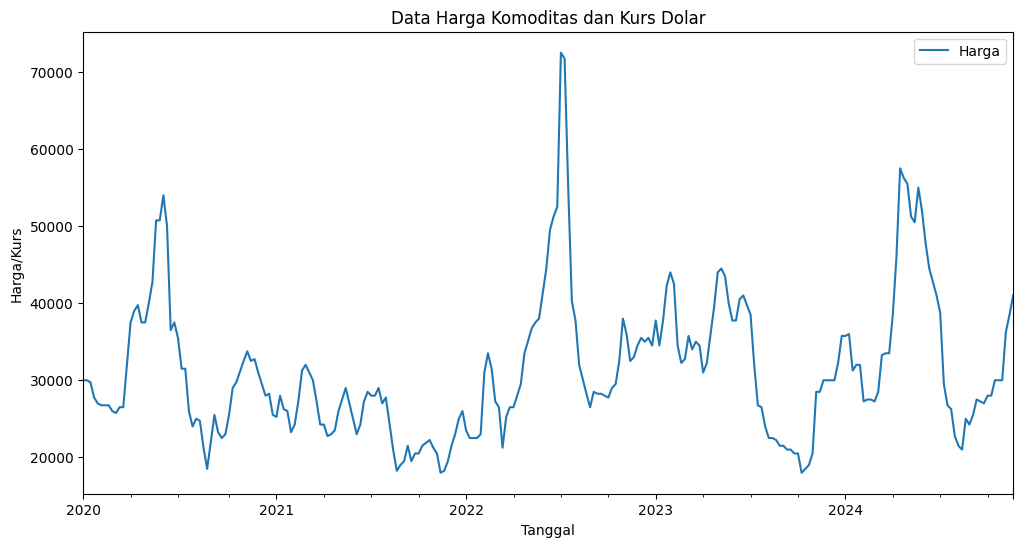

In [9]:
df.plot(figsize=(12, 6), title="Data Harga Komoditas dan Kurs Dolar", xlabel="Tanggal", ylabel="Harga/Kurs")
plt.show()


## 3. Preprocessing

#### 3.1 Normalisasi

In [52]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


#### 3.2 Sliding window

In [56]:
# melakukan sliding window
def sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])     # Ambil kolom Harga
        y.append(data[i + window_size])     # Target adalah nilai setelah windo
    return np.array(X), np.array(y)



window_size = 3  # Ukuran jendela =3
X, y = sliding_window(scaled_data, window_size)
print("X:", X.shape)
print("y:", y.shape)

# Reshape X agar sesuai input untuk model
X = X.reshape(X.shape[0], -1)  # Flatten fitur agar sesuai input KNN/Bagging
print("X (Flatten):", X.shape)


X: (253, 3, 1)
y: (253, 1)
X (Flatten): (253, 3)


#### 3.3 Split data

In [58]:
# Split data (80% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)


In [83]:
print ("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (227, 3)
y_train: (227, 1)
X_test: (26, 3)
y_test: (26, 1)


Data yang digunakan untuk pelatihan yaitu sebanyak 227 sedangkan data yang digunakn untuk tes nantinya ada 26 data

## 4. Modelling

#### 4.1 Menggunakan Linear Decision Tree

*Decision* tree adalah algoritma flowchart berbentuk struktur pohon yang digunakan untuk membantu membuat keputusan atau menyelesaikan tugas yang berkaitan dengan regresi dan klasifikasi.
*source* :Geeks for Geeks </br>
Struktur decision tree dimulai dari simpul akar (root node), cabang, simpul internal (internal node/decision node), dan terakhir simpul daun (leaf node/terminal node).

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
bagging_model = BaggingRegressor(estimator=tree, n_estimators=10, random_state=42)


#### 4.2 Melatih Model pada data

In [77]:
# Melatih model pada data
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

## 5. Prediksi

#### 5.1 denormalisasi

Denormalisasi adalah proses mengambil skema yang sudah dinormalisasi dan membuatnya tidak dinormalisasi

In [78]:
# Prediksi
y_pred = bagging_model.predict(X_test)

# Pastikan y_pred dan y_test berbentuk 2D
y_pred_2d = y_pred.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)

# Denormalisasi hasil prediksi dan y_test
y_pred_denorm = scaler.inverse_transform(y_pred_2d)
y_test_denorm = scaler.inverse_transform(y_test_2d)


#### 5.2 Perhitungan nilai RMSE dan MAPE

##### Nilai RMSE
RMSE mengukur seberapa dekat hasil prediksi model dengan nilai sebenarnya. Rumus RMSE adalah :<br>
RMSE mengukur seberapa besar rata-rata kesalahan antara prediksi dan nilai aktual dalam satuan yang sama dengan data aslinya. RMSE lebih sensitif terhadap kesalahan besar karena setiap selisih antara nilai aktual dan prediksi dikuadratkan
<center>$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}'$</center>

##### Nilai mape (Mean Absolute Percentage Error) </br>
MAPE mengukur kesalahan rata-rata dalam bentuk persentase. MAPE sangat berguna ketika ingin mengetahui persentase kesalahan prediksi rata-rata, tetapi sensitif terhadap nilai aktual kecil karena menyebabkan kesalahan besar jika nilai prediksi mendekati nol. <br>
<center>$MAPE = \frac{1}{n}\sum_{i=1}^n(\frac{|y_i -\hat{y}_i|}{y_i})\cdot100$</center>


In [79]:
#  Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_denorm, y_pred_denorm)
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_pred_denorm))

# Hasil Evaluasi
print("Hasil Evaluasi Model:")
print("MAPE:", mape)
print("RMSE:", rmse)

Hasil Evaluasi Model:
MAPE: 6.447668434254219
RMSE: 2955.407253027913


1.  Nilai RMSE sebesar 2955.40 menunjukkan bahwa rata-rata kesalahan prediksi model adalah sekitar Rp 2955,5  Semakin kecil nilai RMSE, semakin baik model dalam melakukan prediksi <br>
2. Nilai MAPE sebesar 6.44 % menunjukkan bahwa rata-rata kesalahan prediksi model hanya sekitar 6% dari nilai aktual. Nilai ini menunjukkan performa model yang cukup baik, karena kesalahan prediksi berada di sekitar 6%.



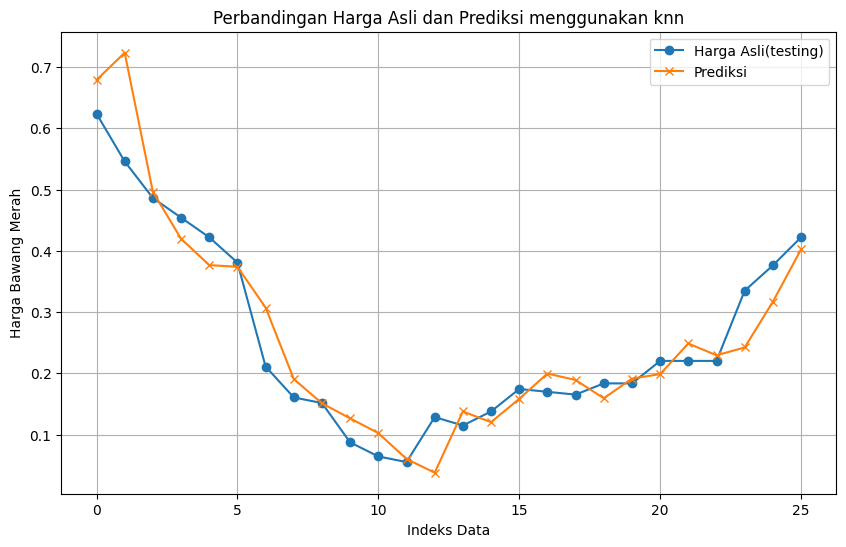

In [80]:
# 6. Visualisasi Hasil (Opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Harga Asli(testing)', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Prediksi', marker='x')
plt.xlabel('Indeks Data')
plt.ylabel('Harga Bawang Merah')
plt.title('Perbandingan Harga Asli dan Prediksi menggunakan knn')
plt.legend()
plt.grid(True)
plt.show()

## 6.Mengambil Model

In [81]:
with open('bagging_model.pkl', 'wb') as file:
    pickle.dump(bagging_model, file)
print("Model berhasil disimpan sebagai 'bagging_model.pkl'.")


Model berhasil disimpan sebagai 'bagging_model.pkl'.


## 7. Deployment hugging face